# North SIE: Daily

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

from source.preprocessing import create_df
from source.visualisation import plot_xy

In [2]:
monthly_df = create_df("monthly")
yearly_df = create_df("yearly")

print("Monthly DataFrame:")
print(monthly_df.head())

print("\nYearly DataFrame:")
print(yearly_df.head())


Monthly DataFrame:
   Year  Month     Extent
0  1978     10  10.402667
1  1978     11  11.645133
2  1978     12  13.667063
3  1979      1  15.414000
4  1979      2  16.175286

Yearly DataFrame:
   Year     Extent
0  1978  12.487000
1  1979  12.319560
2  1980  12.334148
3  1981  12.135486
4  1982  12.439445


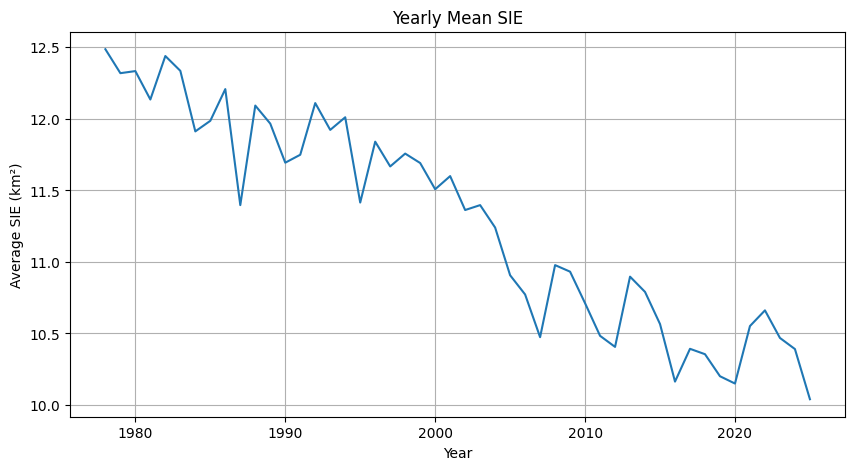

In [13]:
plot_xy(
    x=yearly_df["Year"],
    y=yearly_df["Extent"],
    plot_type="line",
    title="Yearly Mean SIE",
    xlabel="Year",
    ylabel="Average SIE (km²)"
)

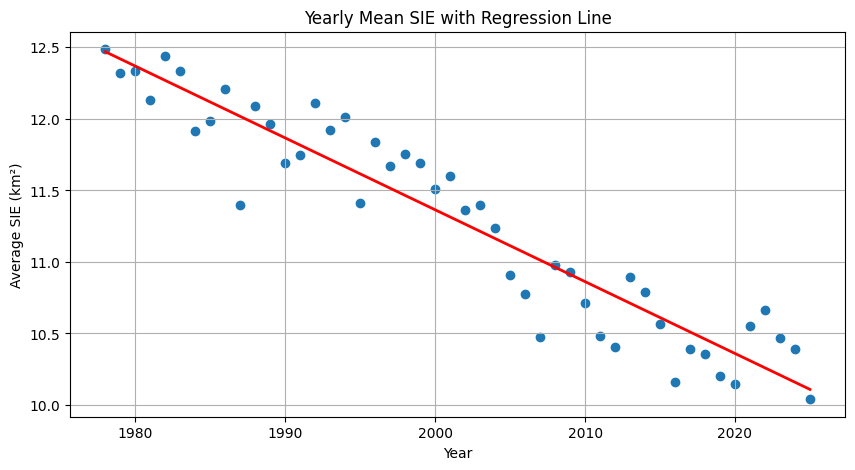

In [11]:
plot_xy(
    x=yearly_df["Year"],
    y=yearly_df["Extent"],
    plot_type="scatter",
    title="Yearly Mean SIE with Regression Line",
    xlabel="Year",
    ylabel="Average SIE (km²)",
    regression_line=True
)

- Clear linear decrease in SIE averaged over each year --> supports using linear regression to predict yearly SIE

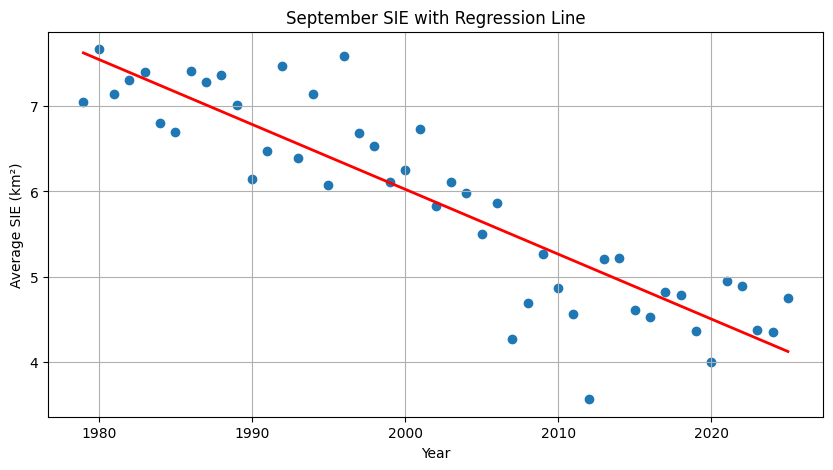

In [14]:
#analysing linear trend in Setember over each year
sept_df = monthly_df[monthly_df["Month"] == 9]

plot_xy(
    x=sept_df["Year"],
    y=sept_df["Extent"],
    plot_type="scatter",
    title="September SIE with Regression Line",
    xlabel="Year",
    ylabel="Average SIE (km²)",
    regression_line=True
)

- Higher variability than with yearly averaged but again a clear decrease in SIE over each year 

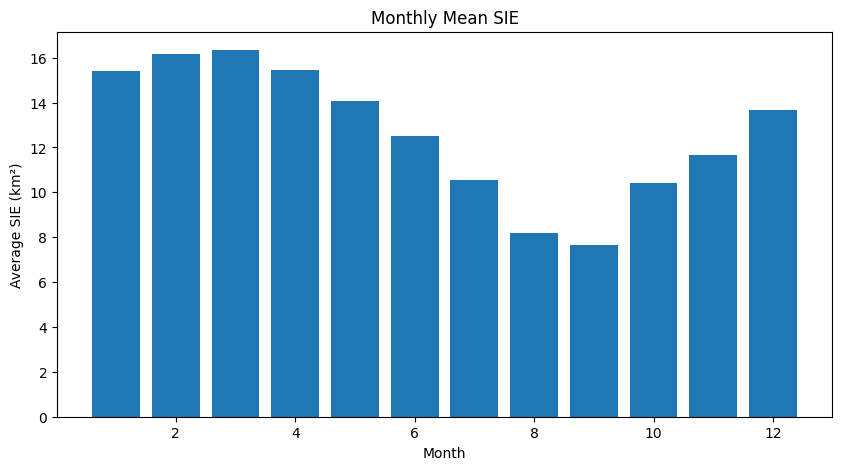

In [15]:
plot_xy(
    x=monthly_df["Month"],
    y=monthly_df["Extent"],
    plot_type="bar",
    title="Monthly Mean SIE",
    xlabel="Month",
    ylabel="Average SIE (km²)"
)

- Can see a reduction in SIE from March to September, followed by a consistent increase until March again --> month is a key predictor when modelling monthly averaged data